# Correlations!
We are going to go back and use linregress to look for correlations between arsenic and other parameters.  Then we will plot them.....  

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages

/Users/bmaillou/anaconda/lib/python2.7/site-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


Get the data in!!!

In [2]:
well_data=pd.read_csv('well_data.csv')

A few notes. Again, pay attention to the details.  Take it slow.  Also, today I am using i again for now. But I switch names later.  Don't let that trip you up.  You control the names!

I want to plot the other elements versus Arsenic and on each graph print the correlation information. so lets first make a nice plot with As on the x-axis.  and Fe on the y-axis using i='Fe'.  

Fe


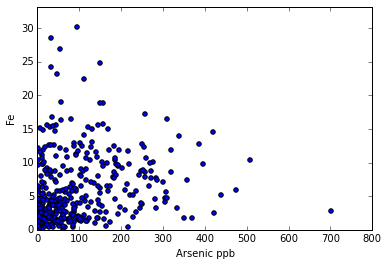

Now lets add linregress to see the correlations.  This has some tricks.  So we will do it seperately and pull it together.  We want stats.linregess(x,y).  our x is arsenic and our y is represented by i.  Unfortunately this gives us nan or not a number.  

In [3]:
i='Fe'
stats.linregress(well_data.As,well_data[i])

(nan, nan, nan, nan, nan)

These nan are becuase stats uses all the data.  pandas screens out the nan's when it does math.  So we need to get rid of them.  There is a function dropna().  But we need to drop from when either one or both have an nan.  I think it is easier to make a new dataframe for this.  So take just As and i and put them into a new pandas dataframe called temp.

In [4]:
temp=well_data[['As',i]]

In [5]:
print temp.head()

         As        Fe
0       NaN       NaN
1       NaN       NaN
2       NaN       NaN
3  78.97747  1.260031
4       NaN       NaN


But we still have nan's.  lets make it with Nan dropped.  

In [6]:
temp=well_data[['As',i]].dropna()

In [7]:
print temp.head()

           As         Fe
3   78.977470   1.260031
6   28.070949   1.843156
8   96.885674  11.740445
9   80.627214   8.923465
11  77.006865   6.349396


Now try linregress again but on the new temp! Think about how to reference it! 

In [9]:
i='Fe'
stats.linregress(temp.As,temp[i])

(0.012996899643346863,
 4.3905256209043939,
 0.25604180950141997,
 1.6310638519922898e-07,
 0.0024382468890464413)

Now we are getting close.  Look up help to remember what all the output is.  Then we can write a caption using fancy print formatting.  set results to linregress and you will get a list.  Then you can make a textstr then print textstr explaining the resutls.  If you type $r^2$ (This is dollar signs around r^2 to make the math) at some point later on the graphs we will get a real r-squared.  Here is the linregress link to remind you of the output.  http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

m=0.013
b=4.391
$r^2$=0.066
p=0.000


Now lets print our one graph with the data.  For these look at our favorite recipes 
http://matplotlib.org/users/recipes.html
and scroll all the way to the bottom.  This is a reminder of what you need to do.  

1.  Make your text string
2.  Make props to give you properties for the box.
3.  pass ax.text and place the box.  

Use your graph from above and add this stuff in.   Plus bring in linregress text string into the same program.  You should almost have all the parts! 

Fe


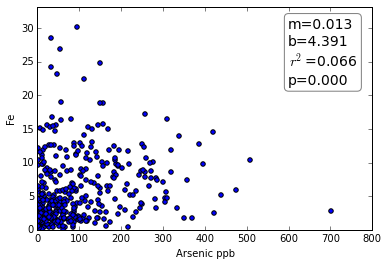

Now we just need to add the best fit line.  You have the m and b from linregress.  I would make an x list that is equal to the min and max of arsenic.  then plot the line.   But a big hint. Since we are using pandas and numpy it works much better to not make x a list but to make x an np.array()

Fe


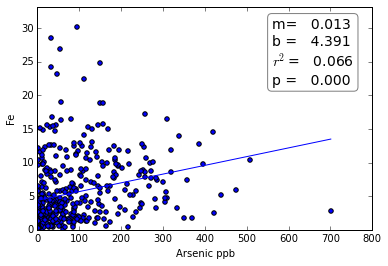

Now we are in great shape.  Lets write it to a file and for loop over all the parameters.  It won't allow you to do As versus As and will crash. so watch out for that!  Also, I can't quite get the textstr to line up nicely. I will work on that some other day

Si
P
S
Ca
Fe
Ba
Na
Mg
K
Mn
As
Sr
F
Cl
SO4
Br


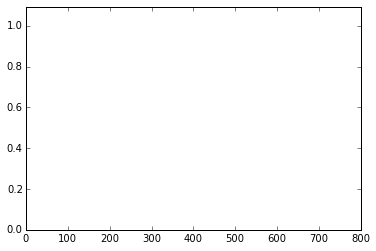

But this is great.  we have all the data.  But now we want to take the best 4 or 6 r2 values and plot them on one sheet.  to get the r2 values we could look through all the graphs.  or we can store them and look at them. I don't have a perfect method to do this.  Here is what I do

1.  Make a new dictionary called rsq.
2.  add to that dictionary every time through the for loop.
3.  convert the dictionary to a pandas dataframe.  
4.  sort the pandas dataframe.
5.  print out the results.  

to make a dictionary that is empty do rsq={}.  then each time through you can set rsq[i]=results[2]**2.

Si
P
S
Ca
Fe
Ba
Na
Mg
K
Mn
As
Sr
F
Cl
SO4
Br


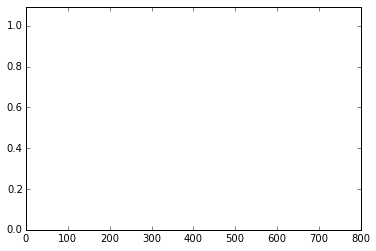

In [3]:
fig,ax=plt.subplots(1,1)
pp = PdfPages('As-corr2.pdf')
props=dict(boxstyle='round',facecolor='white',alpha=0.5)
rsq={}

for i in well_data.iloc[:,5:]:
    print i
    if well_data[i].dtype==float and i!='As':
        ax.scatter(well_data.As,well_data[i])
        ax.set_xlabel('Arsenic ppb')
        ax.set_ylabel(i)
        ax.set_ylim([0,well_data[i].max()*1.1])
        ax.set_xlim([0,800])
        
        temp=well_data[['As',i]].dropna()
        results=stats.linregress(temp.iloc[:,0],temp.iloc[:,1])
        rsq[i]=results[2]**2
        x=np.array([well_data.As.min(),well_data.As.max()])
        ax.plot(x,results[0]*x+results[1])
        textstr='m={:>12.3f}\nb ={:>10.3f}\n$r^2$={:>12.3f}\np ={:>12.3f}'.format(results[0],results[1],results[2]**2,results[3])
        
        ax.text(0.65,0.95,textstr,transform=ax.transAxes,fontsize=14,verticalalignment='top',bbox=props)

        pp.savefig()
        ax.cla()

pp.close()

In [4]:
rsq

{'Ba': 0.059967557784320037,
 'Br': 0.018129949646325683,
 'Ca': 0.15414758813130267,
 'Cl': 0.009093156461315156,
 'F': 3.0410071572413837e-05,
 'Fe': 0.065557408212761403,
 'K': 9.0143453664068301e-05,
 'Mg': 0.00082379607215437483,
 'Mn': 0.032770471028508337,
 'Na': 0.053341594132397252,
 'P': 0.069487669767768143,
 'S': 0.014788813142701297,
 'SO4': 0.021914774802005346,
 'Si': 0.037976891828765923,
 'Sr': 0.15559470057115596}

Python doesn't like sorting dictionaries.  So that is why we turn it into a dataframe. I will set the rows to an index and make the column name rsq.  HERE is a problem.  Pandas used to have a function sort. It no longer has it and now it is sort_values

In [6]:
r2=pd.DataFrame(rsq.items(),columns=['name','rsq'])
print r2.sort_values(by='rsq',ascending=0)

   name       rsq
12   Sr  0.155595
5    Ca  0.154148
8     P  0.069488
10   Fe  0.065557
2    Ba  0.059968
4    Na  0.053342
9    Si  0.037977
6    Mn  0.032770
14  SO4  0.021915
11   Br  0.018130
7     S  0.014789
1    Cl  0.009093
0    Mg  0.000824
13    K  0.000090
3     F  0.000030


## A mistake from last year was to leave rsq in later cells. This messed us up because it kept on getting added to.  

Now lets put our top 4 onto one page!  I will walk you through it.  Grab your plot from above and strip out the file information and the for loop and the dictionary.  It should just be a plot of arsenic versus i.  You can set i='Fe'

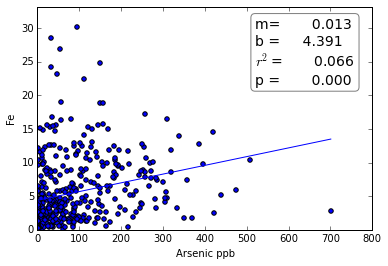

In [7]:
fig,ax=plt.subplots(1,1)
props=dict(boxstyle='round',facecolor='white',alpha=0.5)
i='Fe'
ax.scatter(well_data.As,well_data[i])
ax.set_xlabel('Arsenic ppb')
ax.set_ylabel(i)
ax.set_ylim([0,well_data[i].max()*1.1])
ax.set_xlim([0,800])

temp=well_data[['As',i]].dropna()
results=stats.linregress(temp.iloc[:,0],temp.iloc[:,1])
x=np.array([well_data.As.min(),well_data.As.max()])
ax.plot(x,results[0]*x+results[1])
textstr='m={:>12.3f}\nb ={:>10.3f}\n$r^2$={:>12.3f}\np ={:>12.3f}'.format(results[0],results[1],results[2]**2,results[3])

ax.text(0.65,0.95,textstr,transform=ax.transAxes,fontsize=14,verticalalignment='top',bbox=props)



We are going to use a for loop like last time.  So lets make a list of elems we want to graph.  Grab the top four from above.  then make the subplots 2,2 so we can show four graphs.   You will get an error because ax is a two-d array. 
### You are going to get an error!!

AttributeError: 'numpy.ndarray' object has no attribute 'scatter'

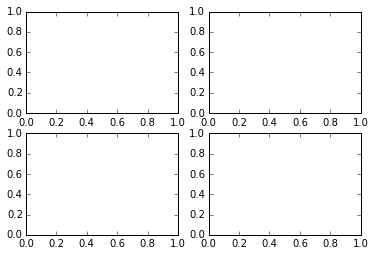

In [21]:
elems=['Sr','Ca','P','Fe']
fig,ax=plt.subplots(2,2)
props=dict(boxstyle='round',facecolor='white',alpha=0.5)
i='Fe'
ax.scatter(well_data.As,well_data[i])
ax.set_xlabel('Arsenic ppb')
ax.set_ylabel(i)
ax.set_ylim([0,well_data[i].max()*1.1])
ax.set_xlim([0,800])

temp=well_data[['As',i]].dropna()
results=stats.linregress(temp.iloc[:,0],temp.iloc[:,1])
x=np.array([well_data.As.min(),well_data.As.max()])
ax.plot(x,results[0]*x+results[1])
textstr='m={:>12.3f}\nb ={:>10.3f}\n$r^2$={:>12.3f}\np ={:>12.3f}'.format(results[0],results[1],results[2]**2,results[3])

ax.text(0.65,0.95,textstr,transform=ax.transAxes,fontsize=14,verticalalignment='top',bbox=props)


After the error Lets change our fig,ax to fig,axtemp then we can set ax=axtemp[0,0] as we go through the four graphs. The 2,2 represent the 2x2 matrix of graphs we are showing. so it is rows,columns.  This will get us through the first graph.  If we can get the first graph to work we can make them all work! 

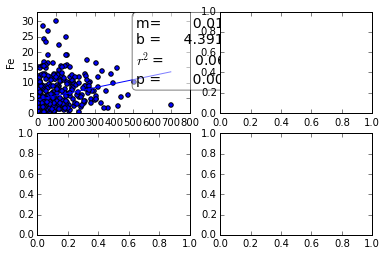

That worked nicely.  Lets first make our fig bigger.  fig.set_size_inches(10,10).  We can also fig.subplots_adjust(wspace=0.2) which will help later.  Now we are ready to loop.  Lets use our enumerate loop from yesterday.  But we are going to crash.  We need to set our ax better.  It needs to do

1. 0,0
2. 1,0
3. 0,1
4. 1,1

I am not sure how to explain this but since we know elem is of length 4 we can use this equation to set it.v    ax=axtemp[i%2][i/2]  Plus you don't use elems to plot things you use elem. So make sure you get the i and elem correct.  I also made the fontsize smaller in ax.text

This is a very confusing point.  We want to plot 4 graphs.  They are 1 through 4.  But we need to put those graphs onto a 2 by 2 grid.  So it is like this

|  |0  |1|
|-------|-------|-------|
|0|0=0,0|2=0,1|
|1|1=1,0|3=1,1|

But rememeber we are in pytyon. So if we have a length of 4 we are really counting 0 to 3.  

So we can use addition, subtraction, division, multiplication, and mod to get this.  

    0 mod 2 = 0        0 divided by 2 = 0

    1 mod 2 = 1        1 divided by 2 = 0

    2 mod 2 = 0        2 divided by 2 = 1

    3 mod 2 = 1        3 divided by 2 =1


So do a for loop and see if you can get these numbers out!

i=0, i%2=0, i/2=0
i=1, i%2=1, i/2=0
i=2, i%2=0, i/2=1
i=3, i%2=1, i/2=1


So now you should be able to mput it all togehter and make your great graph!

#### Flashback
A note on a function you might forget is how to get the spacing between graphs to look good. You might not remember that during the arsenic versus depth graphs I needed to add whitespace between the graphs to make them look good. I used this fucntion
fig.subplots_adjust(wspace=0.2)

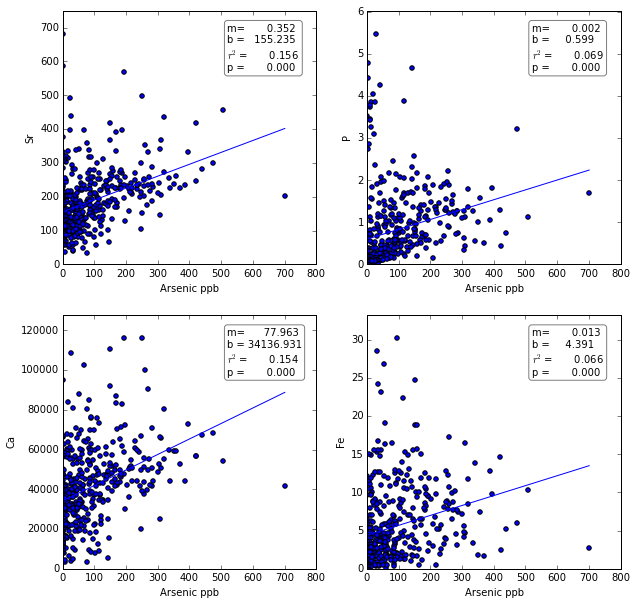

We are close to making this stand alone. The trouble is if we try a new dataset.  Lets try to get rid of all the hardwires.  At the very beginning lets set data=well_data and then use data throughout.  Then lets set arsenic to xval. plus we don't want the set_xlim being 0,800 lets do 0,data[xval].max()*1.1.  You should have an awesome graph!  now finally we can just call plt.savefig('name.png') and the end outside the for loop and we have the figure in a file! 

0
1
2
3


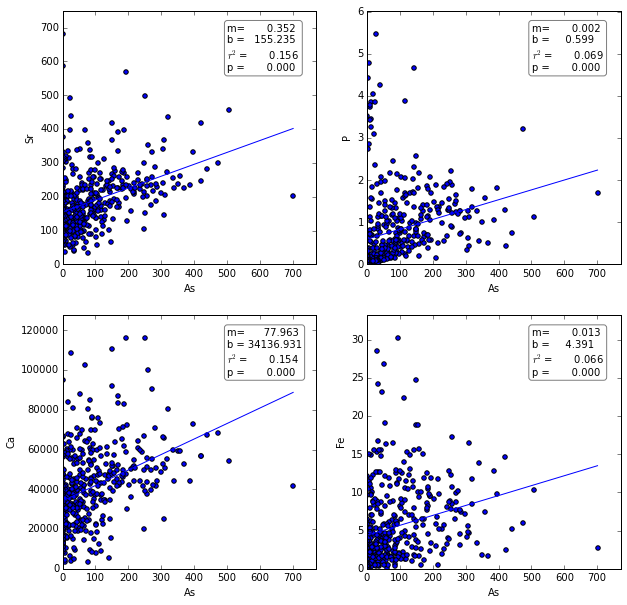

To do six graphs change your elems to the top six and make the subplots array 2,3.  and then change the figure size!  You should have it!

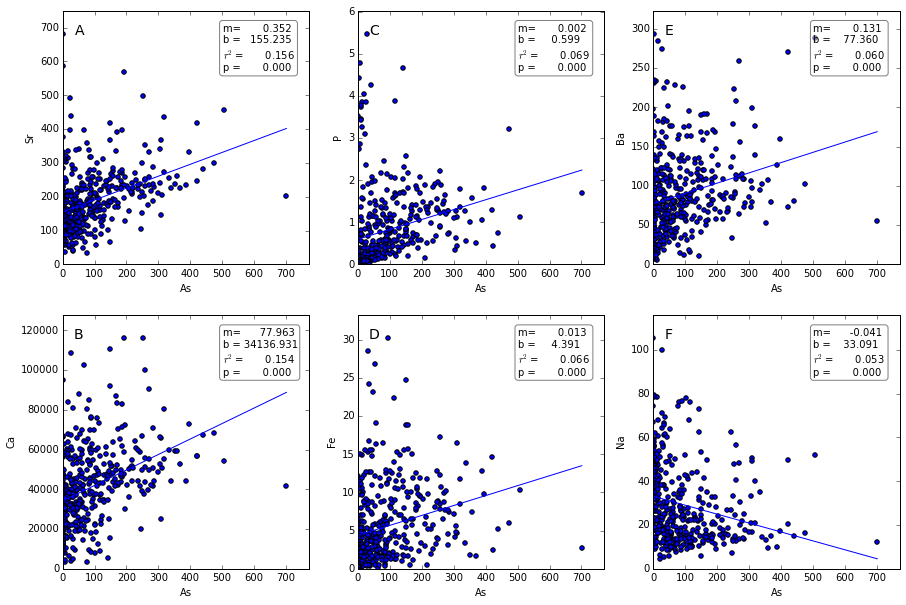

The last thing we need to do is to automatically grab our top 4 or 6 r squared values.  There is a weird thing that I sometimes get with extra values in rsq. I just found my error.  I still was adding to rsq in some of my cells adding extra values.  If you get it.  Just go back up and rerun your cell where you make rsq and make sure you set rsq={} to start with a blank dictionary. I added this key inplace key word.  Try it with and without the inplace call.  The inplace call makes it permanent.  

In [13]:
print rsq
r2=pd.DataFrame(rsq.items(),columns=['name','rsq'])
r2.sort_values(by='rsq',ascending=0,inplace=True)
print r2

{'Mg': 0.00082379607215437483, 'Cl': 0.009093156461315156, 'Ba': 0.059967557784320037, 'F': 3.0410071572413837e-05, 'Na': 0.053341594132397252, 'Ca': 0.15414758813130267, 'Mn': 0.032770471028508337, 'S': 0.014788813142701297, 'P': 0.069487669767768143, 'Si': 0.037976891828765923, 'Fe': 0.065557408212761403, 'Br': 0.018129949646325683, 'Sr': 0.15559470057115596, 'K': 9.0143453664068301e-05, 'SO4': 0.021914774802005346}
   name       rsq
12   Sr  0.155595
5    Ca  0.154148
8     P  0.069488
10   Fe  0.065557
2    Ba  0.059968
4    Na  0.053342
9    Si  0.037977
6    Mn  0.032770
14  SO4  0.021915
11   Br  0.018130
7     S  0.014789
1    Cl  0.009093
0    Mg  0.000824
13    K  0.000090
3     F  0.000030


In [88]:
elems=r2.name[0:6]
print elems

12    Sr
5     Ca
8      P
10    Fe
2     Ba
4     Na
Name: name, dtype: object


Now you could rerun and make your graph with elems being set automatically!!!

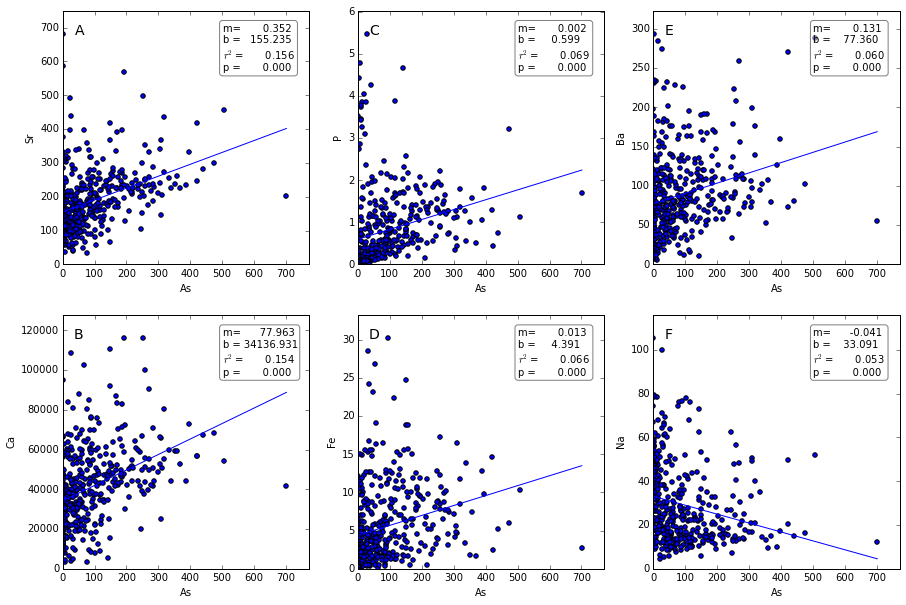

# ANSWERS

Fe


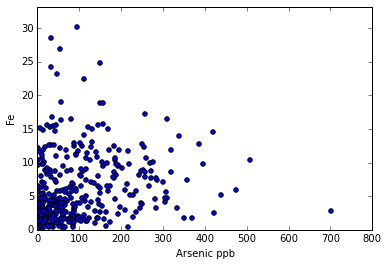

In [12]:
fig,ax=plt.subplots()
i='Fe'
print i
if well_data[i].dtype==float:
    ax.scatter(well_data.As,well_data[i])
    ax.set_xlabel('Arsenic ppb')
    ax.set_ylabel(i)
    ax.set_ylim([0,well_data[i].max()*1.1])
    ax.set_xlim([0,800])

In [96]:
stats.linregress(temp.iloc[:,0],temp.iloc[:,1])

(-0.040692330044319394,
 33.09115045936845,
 -0.23095799213795859,
 2.4907481251641568e-06,
 0.0085182169944277644)

In [97]:
results=stats.linregress(temp.iloc[:,0],temp.iloc[:,1])
textstr='m={:.3f}\nb={:.3f}\n$r^2$={:.3f}\np={:.3f}'.format(results[0],results[1],results[2]**2,results[3])
print textstr

m=-0.041
b=33.091
$r^2$=0.053
p=0.000


Fe


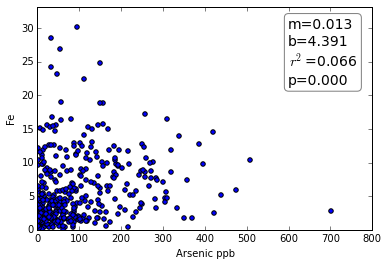

In [98]:
fig,ax=plt.subplots(1,1)
i='Fe'
props=dict(boxstyle='round',facecolor='white',alpha=0.5)
print i
if well_data[i].dtype==float:
    ax.scatter(well_data.As,well_data[i])
    ax.set_xlabel('Arsenic ppb')
    ax.set_ylabel(i)
    ax.set_ylim([0,well_data[i].max()*1.1])
    ax.set_xlim([0,800])
   
    temp=well_data[['As',i]].dropna()
    results=stats.linregress(temp.iloc[:,0],temp.iloc[:,1])
    textstr='m={:.3f}\nb={:.3f}\n$r^2$={:.3f}\np={:.3f}'.format(results[0],results[1],results[2]**2,results[3])
    
    ax.text(0.75,0.95,textstr,transform=ax.transAxes,fontsize=14,verticalalignment='top',bbox=props)


Fe


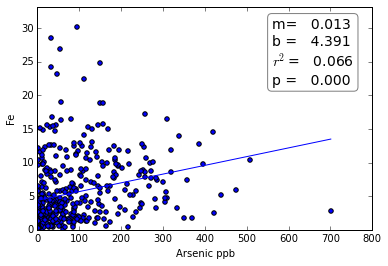

In [15]:
fig,ax=plt.subplots(1,1)
i='Fe'
props=dict(boxstyle='round',facecolor='white',alpha=0.5)
print i
if well_data[i].dtype==float:
    ax.scatter(well_data.As,well_data[i])
    ax.set_xlabel('Arsenic ppb')
    ax.set_ylabel(i)
    ax.set_ylim([0,well_data[i].max()*1.1])
    ax.set_xlim([0,800])
    
    temp=well_data[['As',i]].dropna()
    results=stats.linregress(temp.iloc[:,0],temp.iloc[:,1])
    x=np.array([well_data.As.min(),well_data.As.max()])
    ax.plot(x,results[0]*x+results[1])
    textstr='m={:8.3f}\nb ={:8.3f}\n$r^2$={:8.3f}\np ={:8.3f}'.format(results[0],results[1],results[2]**2,results[3])
    
    ax.text(0.7,0.95,textstr,transform=ax.transAxes,fontsize=14,verticalalignment='top',bbox=props)

Si
P
S
Ca
Fe
Ba
Na
Mg
K
Mn
As
Sr
F
Cl
SO4
Br


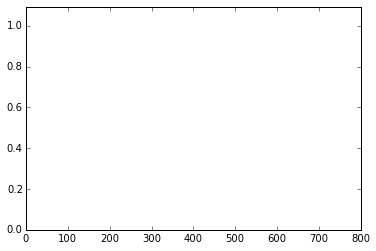

In [16]:
fig,ax=plt.subplots(1,1)
pp = PdfPages('As-corr.pdf')
props=dict(boxstyle='round',facecolor='white',alpha=0.5)

for i in well_data.iloc[:,5:]:
    print i
    if well_data[i].dtype==float and i!='As':
        ax.scatter(well_data.As,well_data[i])
        ax.set_xlabel('Arsenic ppb')
        ax.set_ylabel(i)
        ax.set_ylim([0,well_data[i].max()*1.1])
        ax.set_xlim([0,800])
        
        temp=well_data[['As',i]].dropna()
        results=stats.linregress(temp.iloc[:,0],temp.iloc[:,1])
        x=np.array([well_data.As.min(),well_data.As.max()])
        ax.plot(x,results[0]*x+results[1])
        textstr='m={:>12.3f}\nb ={:>10.3f}\n$r^2$={:>12.3f}\np ={:>12.3f}'.format(results[0],results[1],results[2]**2,results[3])
        
        ax.text(0.65,0.95,textstr,transform=ax.transAxes,fontsize=14,verticalalignment='top',bbox=props)

        pp.savefig()
        ax.cla()

pp.close()

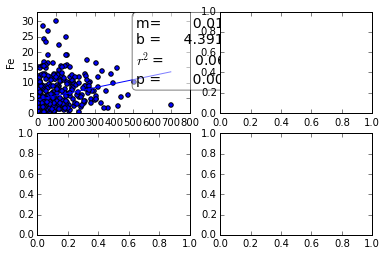

In [101]:
elems=['Sr','Ca','P','Fe']
fig,axtemp=plt.subplots(2,2)
props=dict(boxstyle='round',facecolor='white',alpha=0.5)

ax=axtemp[0,0]
i='Fe'
ax.scatter(well_data.As,well_data[i])
ax.set_xlabel('Arsenic ppb')
ax.set_ylabel(i)
ax.set_ylim([0,well_data[i].max()*1.1])
ax.set_xlim([0,800])

temp=well_data[['As',i]].dropna()
results=stats.linregress(temp.iloc[:,0],temp.iloc[:,1])
x=np.array([well_data.As.min(),well_data.As.max()])
ax.plot(x,results[0]*x+results[1])
textstr='m={:>12.3f}\nb ={:>10.3f}\n$r^2$={:>12.3f}\np ={:>12.3f}'.format(results[0],results[1],results[2]**2,results[3])

ax.text(0.65,0.95,textstr,transform=ax.transAxes,fontsize=14,verticalalignment='top',bbox=props)


In [26]:
for i in range(4):
    print 'i={}, i%2={}, i/2={}'.format(i,i%2,i/2)

i=0, i%2=0, i/2=0
i=1, i%2=1, i/2=0
i=2, i%2=0, i/2=1
i=3, i%2=1, i/2=1


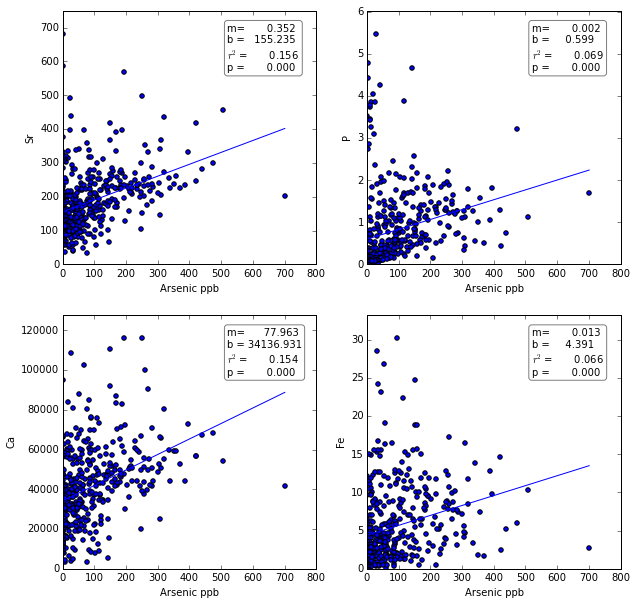

In [29]:
elems=['Sr','Ca','P','Fe']
fig,axtemp=plt.subplots(2,2)
fig.set_size_inches(10,10)
fig.subplots_adjust(wspace=0.2)
props=dict(boxstyle='round',facecolor='white',alpha=0.5)

for i,elem in enumerate(elems):
    ax=axtemp[i%2][i/2]
    ax.scatter(well_data.As,well_data[elem])
    ax.set_xlabel('Arsenic ppb')
    ax.set_ylabel(elem)
    ax.set_ylim([0,well_data[elem].max()*1.1])
    ax.set_xlim([0,800])
    
    temp=well_data[['As',elem]].dropna()
    x=np.array([well_data.As.min(),well_data.As.max()])
    ax.plot(x,results[0]*x+results[1])
    textstr='m={:>12.3f}\nb ={:>10.3f}\n$r^2$={:>12.3f}\np ={:>12.3f}'.format(results[0],results[1],results[2]**2,results[3])
    
    ax.text(0.65,0.95,textstr,transform=ax.transAxes,fontsize=10,verticalalignment='top',bbox=props)

0
1
2
3


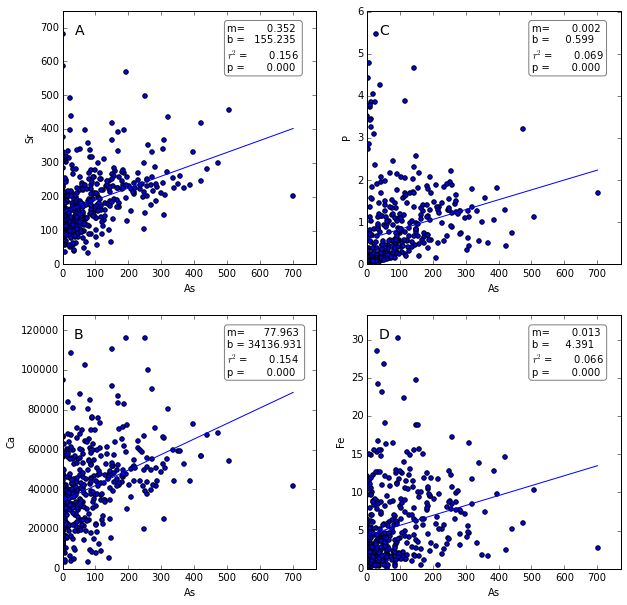

In [9]:
elems=['Sr','Ca','P','Fe']
data=well_data
xval='As'

fig,axtemp=plt.subplots(2,2)
fig.set_size_inches(10,10)
fig.subplots_adjust(wspace=0.2)
props=dict(boxstyle='round',facecolor='white',alpha=0.5)

for i,elem in enumerate(elems):
    print i
    ax=axtemp[i%2][i/2]
    ax.scatter(data[xval],data[elem])
    ax.set_xlabel(xval)
    ax.set_ylabel(elem)
    ax.set_ylim([0,data[elem].max()*1.1])
    ax.set_xlim([0,data[xval].max()*1.1])
    
    temp=well_data[[xval,elem]].dropna()
    results=stats.linregress(temp.iloc[:,0],temp.iloc[:,1])
    x=np.array([data[xval].min(),data[xval].max()])
    ax.plot(x,results[0]*x+results[1])
    textstr='m={:>12.3f}\nb ={:>10.3f}\n$r^2$={:>12.3f}\np ={:>12.3f}'.format(results[0],results[1],results[2]**2,results[3])
    
    ax.text(0.65,0.95,textstr,transform=ax.transAxes,fontsize=10,verticalalignment='top',bbox=props)
    ax.text(0.05,0.95,chr(i + ord('A')),transform=ax.transAxes,fontsize=14,verticalalignment='top')

plt.savefig('As-corr14.png')

0
1
2
3
4
5


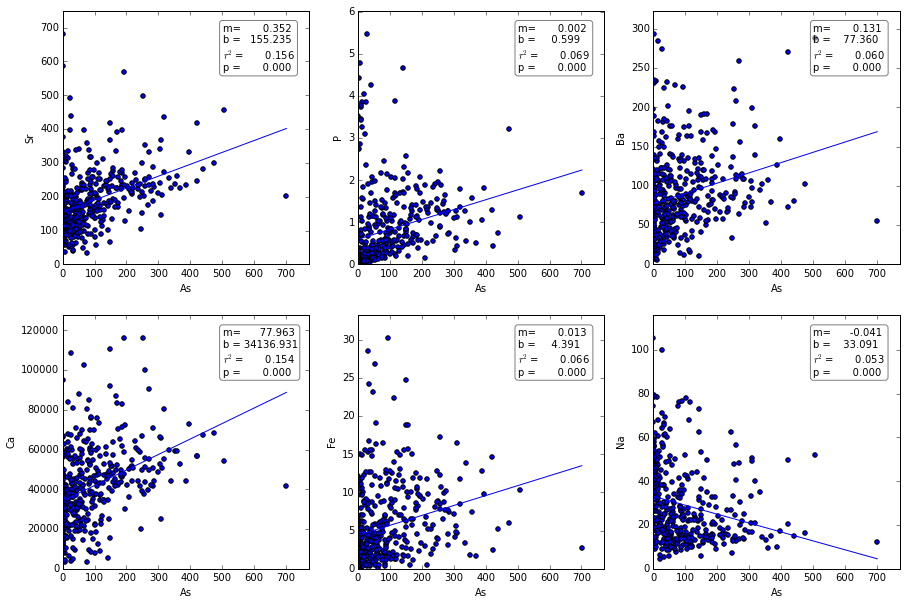

In [36]:
elems=['Sr','Ca','P','Fe','Ba','Na']

#elems=['Sr','Ca','P','Fe']
data=well_data
xval='As'

fig,axtemp=plt.subplots(2,3)
fig.set_size_inches(15,10)
fig.subplots_adjust(wspace=0.2)
props=dict(boxstyle='round',facecolor='white',alpha=0.5)

for i,elem in enumerate(elems):
    print i
    ax=axtemp[i%2][i/2]
    ax.scatter(data[xval],data[elem])
    ax.set_xlabel(xval)
    ax.set_ylabel(elem)
    ax.set_ylim([0,data[elem].max()*1.1])
    ax.set_xlim([0,data[xval].max()*1.1])
    
    temp=well_data[[xval,elem]].dropna()
    results=stats.linregress(temp.iloc[:,0],temp.iloc[:,1])
    x=np.array([data[xval].min(),data[xval].max()])
    ax.plot(x,results[0]*x+results[1])
    textstr='m={:>12.3f}\nb ={:>10.3f}\n$r^2$={:>12.3f}\np ={:>12.3f}'.format(results[0],results[1],results[2]**2,results[3])
    
    ax.text(0.65,0.95,textstr,transform=ax.transAxes,fontsize=10,verticalalignment='top',bbox=props)

plt.savefig('As-corr6.png')

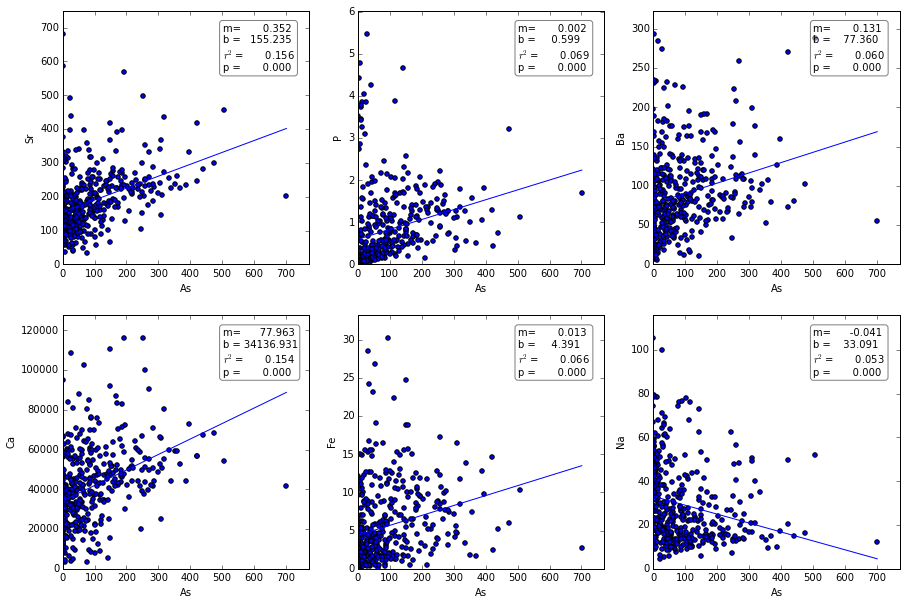

In [14]:
r2=pd.DataFrame(rsq.items(),columns=['name','rsq'])
r2.sort_values(by='rsq',ascending=0,inplace=True)
elems=r2.name[0:6]

data=well_data
xval='As'

fig,axtemp=plt.subplots(2,3)
fig.set_size_inches(15,10)
fig.subplots_adjust(wspace=0.2)
props=dict(boxstyle='round',facecolor='white',alpha=0.5)

for i,elem in enumerate(elems):
    ax=axtemp[i%2][i/2]
    ax.scatter(data[xval],data[elem])
    ax.set_xlabel(xval)
    ax.set_ylabel(elem)
    ax.set_ylim([0,data[elem].max()*1.1])
    ax.set_xlim([0,data[xval].max()*1.1])
    
    temp=well_data[[xval,elem]].dropna()
    results=stats.linregress(temp.iloc[:,0],temp.iloc[:,1])
    x=np.array([data[xval].min(),data[xval].max()])
    ax.plot(x,results[0]*x+results[1])
    textstr='m={:>12.3f}\nb ={:>10.3f}\n$r^2$={:>12.3f}\np ={:>12.3f}'.format(results[0],results[1],results[2]**2,results[3])
    
    ax.text(0.65,0.95,textstr,transform=ax.transAxes,fontsize=10,verticalalignment='top',bbox=props)

plt.savefig('As-corr6.png')

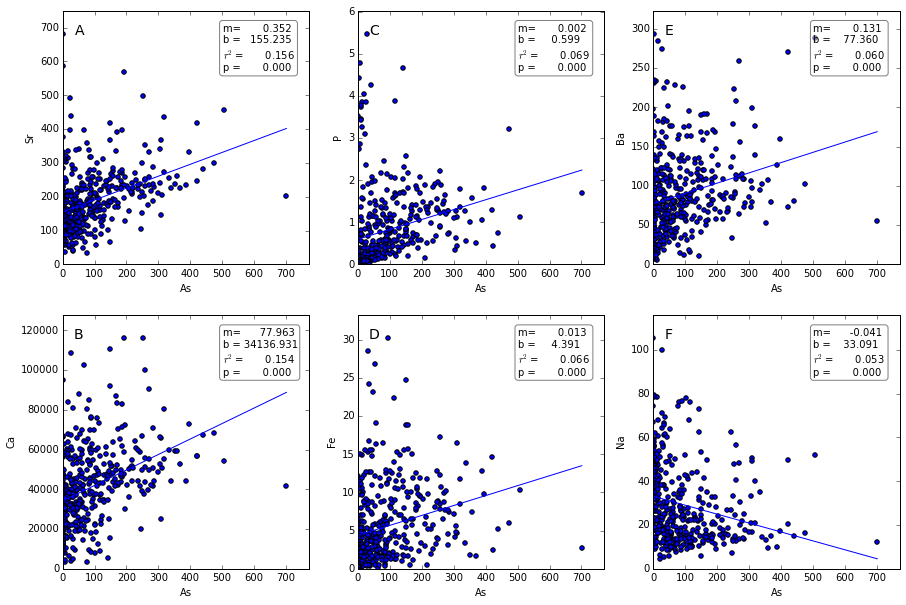

In [15]:
r2=pd.DataFrame(rsq.items(),columns=['name','rsq'])
r2.sort_values(by='rsq',ascending=0,inplace=True)
elems=r2.name[0:6]

data=well_data
xval='As'

fig,axtemp=plt.subplots(2,3)
fig.set_size_inches(15,10)
fig.subplots_adjust(wspace=0.2)
props=dict(boxstyle='round',facecolor='white',alpha=0.5)

for i,elem in enumerate(elems):
    ax=axtemp[i%2][i/2]
    ax.scatter(data[xval],data[elem])
    ax.set_xlabel(xval)
    ax.set_ylabel(elem)
    ax.set_ylim([0,data[elem].max()*1.1])
    ax.set_xlim([0,data[xval].max()*1.1])
    
    temp=well_data[[xval,elem]].dropna()
    results=stats.linregress(temp.iloc[:,0],temp.iloc[:,1])
    x=np.array([data[xval].min(),data[xval].max()])
    ax.plot(x,results[0]*x+results[1])
    textstr='m={:>12.3f}\nb ={:>10.3f}\n$r^2$={:>12.3f}\np ={:>12.3f}'.format(results[0],results[1],results[2]**2,results[3])
    
    ax.text(0.65,0.95,textstr,transform=ax.transAxes,fontsize=10,verticalalignment='top',bbox=props)
    ax.text(0.05,0.95,chr(i + ord('A')),transform=ax.transAxes,fontsize=14,verticalalignment='top')

plt.savefig('As-corr6.png')